## Final Project Submission

Please fill out:
* Student name: Mary Nabwire Okello
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: Fidelis Wanalwenge
* Blog post URL:


# Step 1: Understanding the Data
Objective:
Our company is planning to enter the aviation industry and seeks to identify the aircraft types with the lowest associated risks to inform strategic investment decisions.

Key Questions to Address:

1.Which aircraft models have the lowest accident rates?

2.What factors contribute most significantly to severe accidents?

3.Are there specific conditions, such as weather or flight phase, that are more strongly associated with accidents?


# Step 2: Exploring Our Data
In this step, we will perform the initial data exploration to understand the structure and quality of our dataset. Specifically, we will:

1.Import the relevant libraries needed for data manipulation and analysis.

2.Load the dataset into a Pandas DataFrame.

3.Review basic information about the dataset, such as data types, number of rows and columns, and memory usage.

4.Identify missing values to understand data completeness and determine the need for cleaning or imputation.

# Import the relevant Libraries



In [1]:
#importing the relevant libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the data into Pandas DataFrame

In [2]:
#load the data into a pandas DataFrame
df=pd.read_csv("data/Aviation_Data.csv")
df

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#some columns (in this case, columns 6, 7, and 28) contain mixed data types (ie. some rows have numbers, others have text).
#let us fix that by Setting low_memory=False forcing pandas to read the entire file in one go, so it can look at all rows and pick the correct data type consistently.
df = pd.read_csv("data/Aviation_Data.csv", low_memory=False, index_col=0)


# Check for basic information
 Here we check for the general information contained in our data set, display the first and last 5 rows, the number of columns and rows, the column names as well as any duplicates available in the data. 

In [4]:
# Check for column names, their data types and the number of values they contain
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50249 non-null  object 
 8   Airport.Name            52790 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87572 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [5]:
# Display the first 5 rows
df.head()


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
# Display the last 5 rows
df.tail()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
# Display the number of columns and rows in the dataframe
df.shape

(90348, 30)

In [8]:
# Display the column names
df.columns


Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
# Check for duplicates
df.duplicated().sum()

1390

In [10]:
# Display duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 3: Cleaning Our Data
To ensure the dataset is clean, reliable, and ready for analysis, we performed the following data cleaning steps:

1.Dropped irrelevant or high-missing-value columns that did not contribute meaningful insights.

2.Dropped duplicate records to prevent data redundancy and ensure accuracy in analysis.

3.Handled missing values in critical columns using appropriate imputation or removal methods.

4.Created a clean fatality metric to standardize how fatalities are captured and calculated.

5.Standardized date formats and categorical variables for uniformity and easier analysis.

6.Validated numerical fields by checking for outliers or invalid values that could distort results.

7.Handled any remaining missing values through imputation, correction, or exclusion.


In [11]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows (if any)
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
display(duplicate_rows)  


Number of duplicate rows: 1390


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Dropping our duplicates
df.drop_duplicates(inplace =True)


In [13]:
# Confirm removal
print(f"Dataset shape after dropping duplicates: {df.shape}")

Dataset shape after dropping duplicates: (88958, 30)


In [14]:
# Identify the important columns for analysis
columns_to_keep = [
    'Engine.Type', 'Number.of.Engines', 'Purpose.of.flight', 'Weather.Condition',
    'Aircraft.damage', 'Injury.Severity', 'Make', 'Model', 'Country', 'Event.Date'
]
df.dropna(subset=columns_to_keep, inplace=True)

In [15]:
# Check for missing data after cleaning
df.isnull().sum().sort_values(ascending = False)

Schedule                  68150
Air.carrier               64261
Aircraft.Category         51633
FAR.Description           51630
Longitude                 48440
Latitude                  48430
Airport.Code              30517
Airport.Name              27913
Broad.phase.of.flight     17240
Publication.Date          13248
Total.Serious.Injuries    10263
Total.Minor.Injuries       9540
Total.Fatal.Injuries       9394
Total.Uninjured            4701
Report.Status               565
Registration.Number          40
Location                     16
Amateur.Built                15
Event.Date                    0
Country                       0
Accident.Number               0
Model                         0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Weather.Condition             0
Investigation.Type            0
dtype: int64

In [16]:
# Drop columns with high missing values or low relevance to our analysis
columns_to_drop = [
    'Aircraft.Category',     # Too many missing values
    'Report.Status',         # High nulls
    'Schedule',              # High nulls
    'Air.carrier',           # High nulls
    'FAR.Description',       # Not useful for current analysis
    'Longitude',             # Not necessary for risk pattern analysis
    'Latitude',              # Not necessary for risk pattern analysis
    'Publication.Date'       # Duplicate of Event.Date with less relevance
]

df.drop(columns=columns_to_drop, inplace=True)

# Confirm dropped columns
print(f"Remaining columns after drop: {df.columns.tolist()}")


Remaining columns after drop: ['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']


In [17]:
# Check for missing data after cleaning
df.isnull().sum().sort_values(ascending = False)

Airport.Code              30517
Airport.Name              27913
Broad.phase.of.flight     17240
Total.Serious.Injuries    10263
Total.Minor.Injuries       9540
Total.Fatal.Injuries       9394
Total.Uninjured            4701
Registration.Number          40
Location                     16
Amateur.Built                15
Injury.Severity               0
Accident.Number               0
Event.Date                    0
Country                       0
Make                          0
Aircraft.damage               0
Weather.Condition             0
Model                         0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Investigation.Type            0
dtype: int64

In [18]:
# Convert 'Total.Fatal.Injuries' to numeric (if needed)
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')


In [19]:
# Fillna
injury_columns =['Total.Serious.Injuries','Total.Minor.Injuries','Total.Fatal.Injuries','Total.Uninjured']
df[injury_columns] = df[injury_columns].fillna(0)

In [20]:
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
injury_cols = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
df['Total.Occupants'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Uninjured']
)
df['Was.Fatal'] = df['Total.Fatal.Injuries'].apply(lambda x: 1 if x > 0 else 0)


In [21]:
# Check for missing data after cleaning
df.isnull().sum().sort_values(ascending = False)

Airport.Code              30517
Airport.Name              27913
Broad.phase.of.flight     17240
Registration.Number          40
Location                     16
Amateur.Built                15
Was.Fatal                     0
Make                          0
Accident.Number               0
Event.Date                    0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Model                         0
Total.Occupants               0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Investigation.Type            0
dtype: int64

In [22]:
airport_columns =['Airport.Code','Airport.Name']
df[airport_columns] = df[airport_columns].fillna('Unknown')

In [23]:
# Check for missing data after cleaning
df.isnull().sum().sort_values(ascending = False)


Broad.phase.of.flight     17240
Registration.Number          40
Location                     16
Amateur.Built                15
Was.Fatal                     0
Make                          0
Accident.Number               0
Event.Date                    0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Model                         0
Total.Occupants               0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Investigation.Type            0
dtype: int64

In [24]:
# Standardize text casing in categorical columns
text_columns = ['Broad.phase.of.flight', 'Make', 'Model', 'Purpose.of.flight']
for col in text_columns:
    df[col] = df[col].str.title()  # Title Case


In [25]:
# Fix common inconsistencies (example for 'Make')
df['Make'] = df['Make'].replace({
    'Mcdonnell Douglas': 'McDonnell Douglas',
    'Bell Helicopter': 'Bell'
})


In [26]:

# Fill missing values in 'Broad.phase.of.flight' with 'Unknown' to handle nulls consistently
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')


In [27]:
# Check for outliers in 'Number.of.Engines'
print(df['Number.of.Engines'].value_counts())



1.0    66056
2.0     8224
0.0      621
3.0      260
4.0      216
8.0        2
Name: Number.of.Engines, dtype: int64


In [28]:
# Check 'Total.Fatal.Injuries' distribution
print(df['Total.Fatal.Injuries'].describe())


count    75379.000000
mean         0.391409
std          2.811264
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        270.000000
Name: Total.Fatal.Injuries, dtype: float64


In [29]:
# Clean up values (remove leading/trailing spaces, convert to uppercase)
df['Engine.Type'] = df['Engine.Type'].str.strip().str.upper()

# Replace 'NONE' with None (Python's null) and 'UNK' with 'Unknown'
df['Engine.Type'] = df['Engine.Type'].replace({
    'NONE': None,
    'UNK': 'Unknown',
    'Unknown' : 'UNKNOWN'
})

In [30]:
# Verify cleaned data
print("\nFinal DataFrame Info:")
df.info()



Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 75379 entries, 20001218X45444 to 20221109106272
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      75379 non-null  object 
 1   Accident.Number         75379 non-null  object 
 2   Event.Date              75379 non-null  object 
 3   Location                75363 non-null  object 
 4   Country                 75379 non-null  object 
 5   Airport.Code            75379 non-null  object 
 6   Airport.Name            75379 non-null  object 
 7   Injury.Severity         75379 non-null  object 
 8   Aircraft.damage         75379 non-null  object 
 9   Registration.Number     75339 non-null  object 
 10  Make                    75379 non-null  object 
 11  Model                   75379 non-null  object 
 12  Amateur.Built           75364 non-null  object 
 13  Number.of.Engines       75379 non-null  float64
 14

In [31]:
# Sample output
print("\nSample Data:")
print(df.head(3))



Sample Data:
               Investigation.Type Accident.Number  Event.Date  \
Event.Id                                                        
20001218X45444           Accident      SEA87LA080  1948-10-24   
20001218X45447           Accident      LAX94LA336  1962-07-19   
20061025X01555           Accident      NYC07LA005  1974-08-30   

                       Location        Country Airport.Code Airport.Name  \
Event.Id                                                                   
20001218X45444  MOOSE CREEK, ID  United States      Unknown      Unknown   
20001218X45447   BRIDGEPORT, CA  United States      Unknown      Unknown   
20061025X01555    Saltville, VA  United States      Unknown      Unknown   

               Injury.Severity Aircraft.damage Registration.Number  ...  \
Event.Id                                                            ...   
20001218X45444        Fatal(2)       Destroyed              NC6404  ...   
20001218X45447        Fatal(4)       Destroyed        

In [32]:
# Check for missing data after cleaning
df.isnull().sum().sort_values(ascending = False)


Registration.Number       40
Location                  16
Engine.Type               15
Amateur.Built             15
Was.Fatal                  0
Make                       0
Accident.Number            0
Event.Date                 0
Country                    0
Airport.Code               0
Airport.Name               0
Injury.Severity            0
Aircraft.damage            0
Model                      0
Total.Occupants            0
Number.of.Engines          0
Purpose.of.flight          0
Total.Fatal.Injuries       0
Total.Serious.Injuries     0
Total.Minor.Injuries       0
Total.Uninjured            0
Weather.Condition          0
Broad.phase.of.flight      0
Investigation.Type         0
dtype: int64

In [33]:
# Check prcentage of missing values
df.isnull().sum() * 100 / len(df)


Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.021226
Country                   0.000000
Airport.Code              0.000000
Airport.Name              0.000000
Injury.Severity           0.000000
Aircraft.damage           0.000000
Registration.Number       0.053065
Make                      0.000000
Model                     0.000000
Amateur.Built             0.019899
Number.of.Engines         0.000000
Engine.Type               0.019899
Purpose.of.flight         0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         0.000000
Broad.phase.of.flight     0.000000
Total.Occupants           0.000000
Was.Fatal                 0.000000
dtype: float64

In [34]:
# Convert eventdate to date time format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [35]:
# Drop event rows where event date could not be parsed
df = df[df['Event.Date'].notnull()].copy()


In [36]:
# Extract the year and the month column
df['Year']=df['Event.Date'].dt.year


In [37]:
# Extract the year and the month column
df['Month']=df['Event.Date'].dt.month

In [38]:
# Check the years in our data
df['Year'].sort_values(ascending = False)


Event.Id
20221109106272    2022
20220420104975    2022
20220411104924    2022
20220622105305    2022
20220411104927    2022
                  ... 
20001218X45446    1981
20001218X45448    1977
20061025X01555    1974
20001218X45447    1962
20001218X45444    1948
Name: Year, Length: 75379, dtype: int64

In [39]:
df['Weather.Condition'].str.upper().str.strip()

df['Weather.Condition'] = df['Weather.Condition'].replace({
    'UNK': 'UNKNOWN'
})

In [40]:
df['Weather.Condition'].str.upper().str.strip()

df['Weather.Condition'] = df['Weather.Condition'].replace({
    'Unk': 'UNKNOWN'
})

In [41]:
print(df['Aircraft.damage'].value_counts(dropna=False))
print(df['Purpose.of.flight'].value_counts(dropna=False))
print(df['Injury.Severity'].value_counts(dropna=False))


Substantial    57685
Destroyed      16017
Minor           1671
Unknown            6
Name: Aircraft.damage, dtype: int64
Personal                     45923
Instructional                 9933
Unknown                       5164
Aerial Application            4486
Business                      3695
Positioning                   1481
Other Work Use                1064
Ferry                          749
Aerial Observation             668
Public Aircraft                651
Executive/Corporate            484
Flight Test                    344
Skydiving                      163
Banner Tow                      94
External Load                   92
Public Aircraft - Federal       86
Public Aircraft - Local         67
Public Aircraft - State         60
Air Race Show                   57
Air Race/Show                   48
Glider Tow                      35
Firefighting                    22
Air Drop                         8
Pubs                             2
Asho                             2
Publ 

# Exploring Accidents Trend
 1. Aircraft models with lowest accident rates
 2. Factors contributing to severe accidents
 3. Conditions leading to more accidents


# Aircraft Types with the Most Accidents
We are determining the top ten aircraft types with the most accidents

In [42]:
# Combine Make and Model into one Aircraft_Type column
df['Aircraft_Type'] = df['Make'].str.upper().str.strip() + " " + df['Model'].str.upper().str.strip()




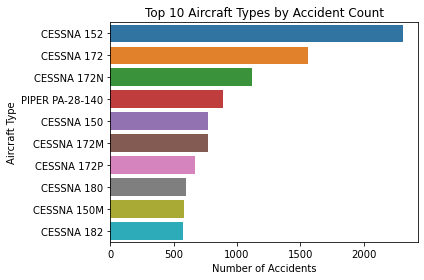

In [43]:
# Count number of accidents per aircraft type
aircraft_counts = df['Aircraft_Type'].value_counts().reset_index()
aircraft_counts.columns = ['Aircraft_Type', 'Accident_Count']

# Display top 10
top10 = aircraft_counts.head(10)
sns.barplot(data=top10, x='Accident_Count', y='Aircraft_Type')
plt.title("Top 10 Aircraft Types by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()



# Factors Contributing to Accident Severity
Our aim here is to determine the factors contributing to accident severity in this industry.
These included comparisons such as:

    -Injury severity by aircraft damage
    -Injury severity by purpose of flight.
    -Weather severity by accident severity

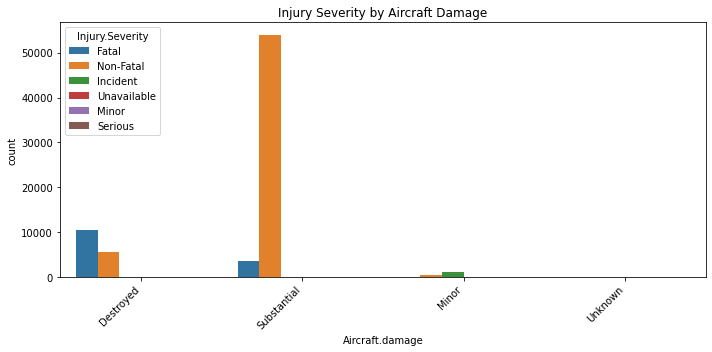

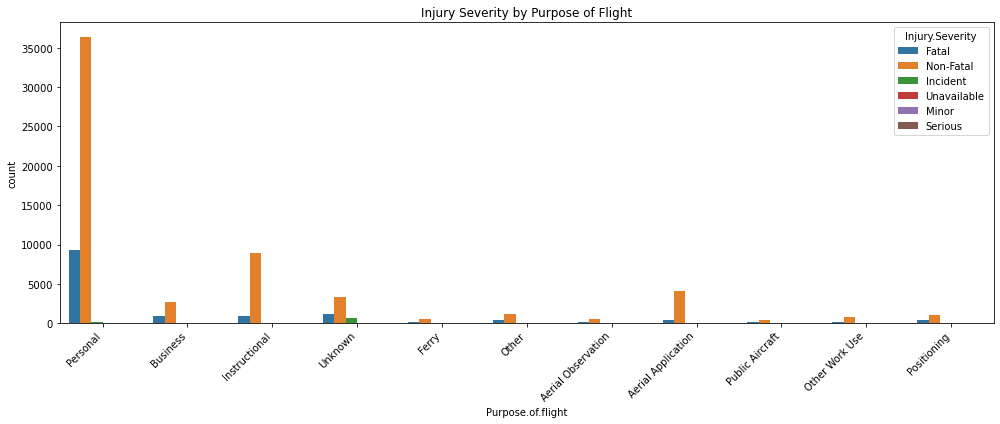

In [44]:
# Severity vs. Aircraft Damage and Purpose of Flight

# Step 1: Drop missing values in key columns
df_cleaned = df.dropna(subset=['Aircraft.damage', 'Purpose.of.flight', 'Injury.Severity'])

# Step 2: Standardize Injury.Severity (e.g., Fatal(1), Fatal(2), Fatal(4) → Fatal)
df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].apply(
    lambda x: 'Fatal' if isinstance(x, str) and x.startswith('Fatal') else x
)

# Step 3: Group rare Purpose.of.flight values into 'Other'
top_purposes = df_cleaned['Purpose.of.flight'].value_counts().nlargest(10).index
df_cleaned['Purpose.of.flight'] = df_cleaned['Purpose.of.flight'].apply(
    lambda x: x if x in top_purposes else 'Other'
)

# Step 4: Plot - Injury Severity by Aircraft Damage
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='Aircraft.damage', hue='Injury.Severity')
plt.title("Injury Severity by Aircraft Damage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 5: Plot - Injury Severity by Purpose of Flight
plt.figure(figsize=(14, 6))
sns.countplot(data=df_cleaned, x='Purpose.of.flight', hue='Injury.Severity')
plt.title("Injury Severity by Purpose of Flight")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Weather Conditions vs. Accident Severity

<ipython-input-45-9b0fd3d17eed>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1008x576 with 0 Axes>

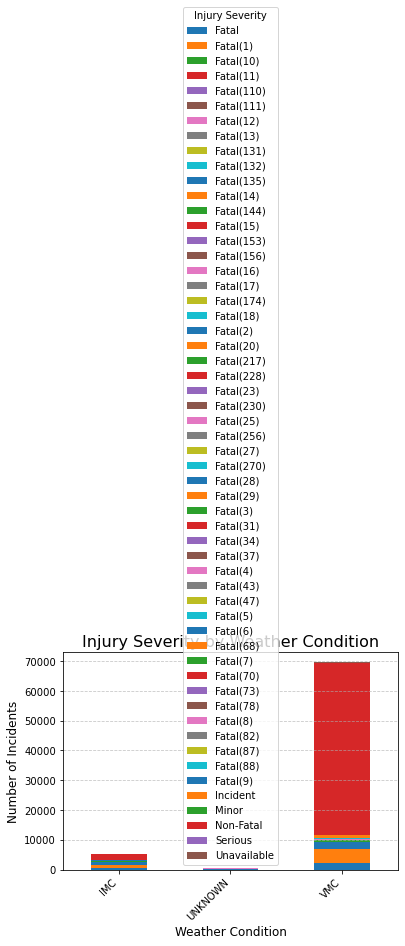

In [45]:
# Cell 3: Weather Condition vs. Severity

# Step 1: Filter relevant columns and drop missing values
df_filtered = df[['Weather.Condition', 'Injury.Severity']].dropna()

# Step 2: Count number of each Injury.Severity per Weather.Condition
severity_counts = (
    df_filtered
    .groupby(['Weather.Condition', 'Injury.Severity'])
    .size()
    .unstack(fill_value=0)
)

# Step 3: Plotting
plt.figure(figsize=(14, 8))  # Set figure size

severity_counts.plot(kind='bar', stacked=True)

# Step 4: Formatting the plot
plt.title('Injury Severity by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Adjust layout and display the plot
plt.tight_layout()
plt.show()

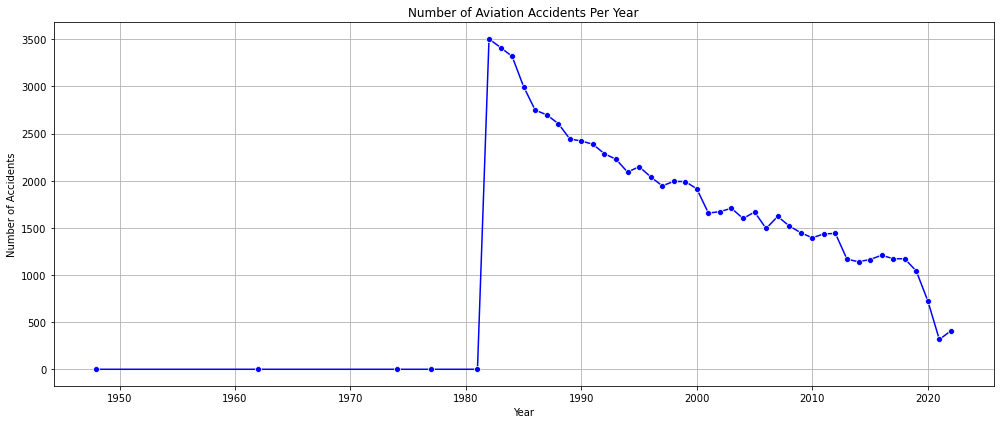

In [46]:
# No. of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o', color='blue')
plt.title("Number of Aviation Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

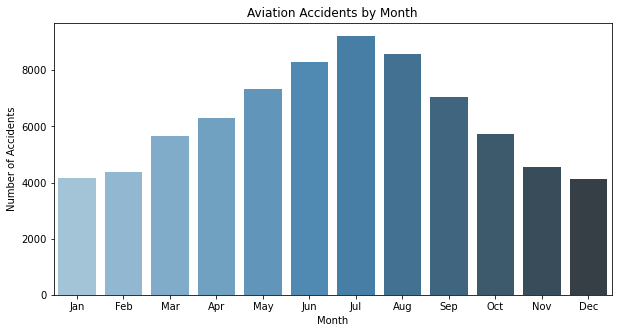

In [47]:
accidents_per_month = df['Month'].value_counts().sort_index()

# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10,5))
sns.barplot(x=month_names, y=accidents_per_month.values, palette="Blues_d")
plt.title("Aviation Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

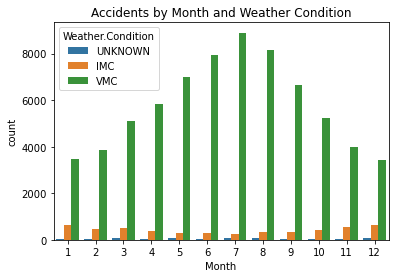

In [48]:
sns.countplot(data=df, x='Month', hue='Weather.Condition')
plt.title('Accidents by Month and Weather Condition')
plt.show()

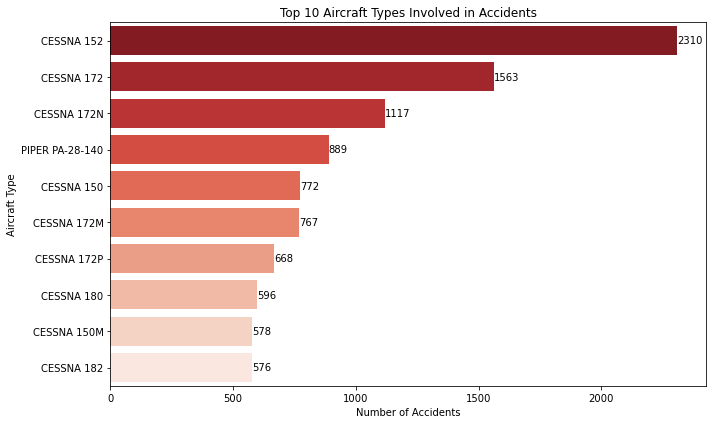

In [49]:

# Get top 10 most common aircraft types
top10 = df['Aircraft_Type'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y=top10.index, x=top10.values, palette="Reds_r")

# Add value labels
for i, value in enumerate(top10.values):
    plt.text(value + 1, i, str(value), va='center')

plt.title("Top 10 Aircraft Types Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()


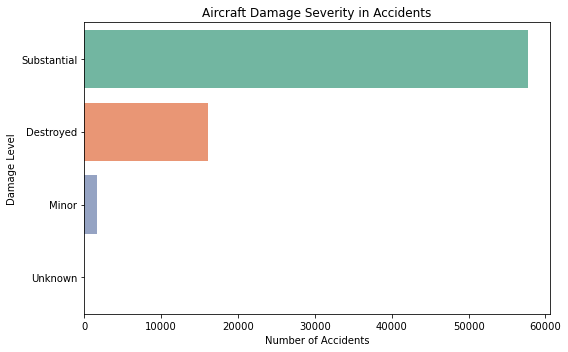

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Aircraft.damage', order=df['Aircraft.damage'].value_counts().index, palette="Set2")
plt.title("Aircraft Damage Severity in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Damage Level")
plt.tight_layout()
plt.show()


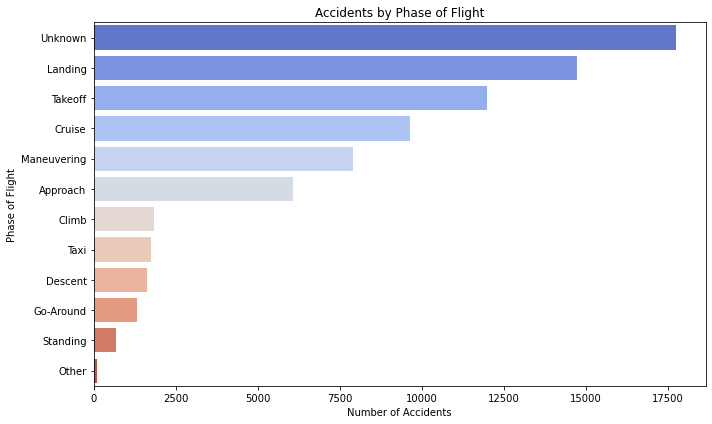

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Broad.phase.of.flight', order=df['Broad.phase.of.flight'].value_counts().index, palette='coolwarm')
plt.title("Accidents by Phase of Flight")
plt.xlabel("Number of Accidents")
plt.ylabel("Phase of Flight")
plt.tight_layout()
plt.show()

In [52]:
df.to_csv("cleaned_aviation_data.csv", index=False)
